# Nombre: Jorge Arévalo
# Docente: Ing. Diego Quisi
# Materia: Simulación

# Prueba Práctica

In [57]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [58]:
def metodoCongruenciaLineal(datox, a, c, mod, iteracion):
    num = 0.00
    arreglo =[]
    for i in range(iteracion):
        datox = (a * datox + c) % mod
        num = round(datox/mod,2)
        arreglo.append(num)
    return arreglo

In [59]:
def obtenerPos(digs):
    dato1 =0
    dato2 =0
    if digs%2 !=0:
        dato1 = int(digs/2)
        dato2 = int(digs/2)+1
    else:
        dato1 = int(digs/2)
        dato2 = dato1
    return dato1,dato2

In [60]:
def metodoCuadradosMedios(iteracion, val, digs):
    arreglo =[]
    x0_semilla = int(val)
    aum = obtenerPos(digs)
    for i in range(iteracion):
        xn2= x0_semilla**2
        lon = len(str(xn2))
        ui = str(xn2)[int(lon/2)-aum[0]:int(lon/2)+aum[1]]
        rn = round(int(ui)/10**digs,2)
        #print(i, " ", x0_semilla," ",xn2, " ", lon, " ",ui, " ", rn)
        arreglo.append(rn)
        x0_semilla=int(ui)
    #print("   ")
    return arreglo
iteracion = 100
digs = 7
arreglo = metodoCuadradosMedios(iteracion, 74731897457, digs)

In [61]:
def metodoLista(num_grupos, aumento, arreglo):
    grupos = []
    ini=0.00
    for i in range(num_grupos+1):
        grupos.append(round(ini,2))
        ini=ini+aumento
    a=0
    b=1
    rangos={}
    for i in range(len(grupos)-1):
        inf=grupos[a]
        sup=grupos[b]
        rangos.update({str(inf)+"," +str(sup):[]})
        for i in arreglo:
            if i==0.00:
                if i >=inf and i <=sup:
                    rangos[str(inf)+","+str(sup)].append(i)
            else:
                if i >inf and i <=sup:
                    rangos[str(inf)+","+str(sup)].append(i)
        a=b
        b=a+1
    return rangos

In [62]:
def metodoChi_Cuadrado(arreglo, valor):
    n = int(mt.sqrt(len(arreglo)))
    dic = metodoLista(n,1/n, arreglo)
    suma = 0.00
    print(" Intervalo ", "      Ei ", "       Oi ", " (Oi-Ei)**2/Ei")
    for datox, it in enumerate(dic.items()):
        f = ((len(it[1])-n)**2)/n
        suma+=f
        print(datox, "         ", str(n)+"("+it[0]+")     ", len(it[1]),"     ", f) 
    print("")
    print("Valor Chi-Cuadrado Cuadrados Medios: ",suma)
    if suma< valor:
        return True
    else:
        return False
def metodoChi_Congruencia(arreglo, valor):
    n = int(mt.sqrt(len(arreglo)))
    dic = metodoLista(n,1/n, arreglo)
    suma = 0.00
    print(" Intervalo ", "      Ei ", "       Oi ", " (Oi-Ei)**2/Ei")
    for datox, it in enumerate(dic.items()):
        f = ((len(it[1])-n)**2)/n
        suma+=f
        print(datox, "         ", str(n)+"("+it[0]+")     ", len(it[1]),"     ", f) 
    print("")
    print("Valor Chi-Cuadrado Congruencia Lineal: ",suma)
    if suma< valor:
        return True
    else:
        return False

# METODO CUADRADOS MEDIOS

In [63]:
valor = 16.9
iteracion = 100
digs = 7
arreglo = metodoCuadradosMedios(iteracion, 74731897457, digs)
res=metodoChi_Cuadrado(arreglo,valor)
print(" ")
print("Frecuencia: ", arreglo) 

 Intervalo        Ei         Oi   (Oi-Ei)**2/Ei
0           10(0.0,0.1)      11       0.1
1           10(0.1,0.2)      18       6.4
2           10(0.2,0.3)      12       0.4
3           10(0.3,0.4)      7       0.9
4           10(0.4,0.5)      13       0.9
5           10(0.5,0.6)      9       0.1
6           10(0.6,0.7)      7       0.9
7           10(0.7,0.8)      5       2.5
8           10(0.8,0.9)      8       0.4
9           10(0.9,1.0)      10       0.0

Valor Chi-Cuadrado Cuadrados Medios:  12.600000000000001
 
Frecuencia:  [0.98, 0.84, 0.11, 0.22, 0.38, 0.17, 0.93, 0.41, 0.03, 0.68, 0.35, 0.35, 0.76, 0.41, 0.04, 0.11, 0.17, 0.23, 0.82, 0.7, 0.17, 0.48, 0.4, 0.24, 0.43, 0.65, 0.2, 0.71, 0.88, 0.93, 0.94, 0.13, 0.56, 0.55, 0.58, 0.18, 0.51, 0.52, 0.05, 0.97, 0.23, 0.23, 0.29, 0.5, 0.12, 0.97, 0.31, 0.16, 0.41, 0.76, 0.26, 0.63, 0.95, 0.1, 0.25, 0.88, 0.71, 0.16, 0.52, 0.38, 0.22, 0.0, 0.58, 0.55, 0.87, 0.0, 0.01, 0.2, 0.91, 0.44, 0.16, 0.5, 0.45, 0.81, 0.27, 0.19, 0.32, 0.14, 0.51

### HISTOGRAMA CUADRADOS MEDIOS

HISTOGRAMA CUADRADOS MEDIOS


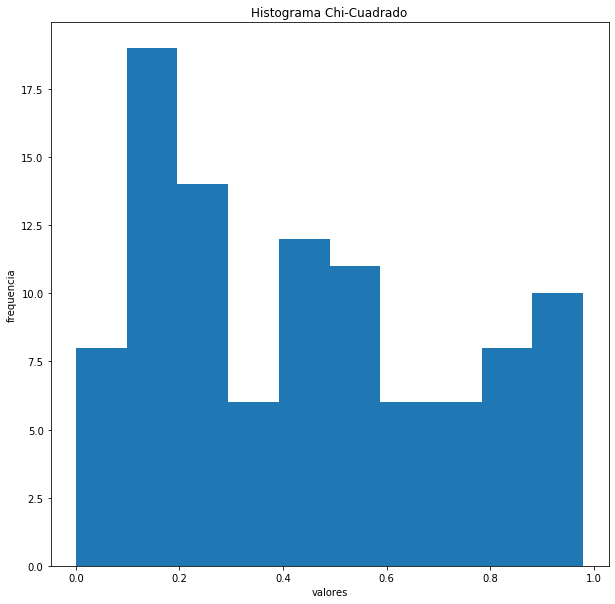

In [64]:
#HISTOGRAMA CUADRADOS MEDIOS
print("HISTOGRAMA CUADRADOS MEDIOS")
plt.hist(arreglo)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi-Cuadrado')
plt.show()

# METODO DE CONGRUENCIA LINEAL

In [65]:
datox = 7
a = 74731897457
c = 37747318974
m = 19
arreglo2 = metodoCongruenciaLineal(datox,a,c,m,iteracion)
res2 = metodoChi_Congruencia(arreglo2,valor)

 Intervalo        Ei         Oi   (Oi-Ei)**2/Ei
0           10(0.0,0.1)      11       0.1
1           10(0.1,0.2)      11       0.1
2           10(0.2,0.3)      0       10.0
3           10(0.3,0.4)      22       14.4
4           10(0.4,0.5)      0       10.0
5           10(0.5,0.6)      0       10.0
6           10(0.6,0.7)      11       0.1
7           10(0.7,0.8)      11       0.1
8           10(0.8,0.9)      23       16.9
9           10(0.9,1.0)      11       0.1

Valor Chi-Cuadrado Congruencia Lineal:  61.800000000000004


### HISTOGRAMA CONGRUENCIA LINEAL

HISTOGRAMA CONGRUENCIA LINEAL


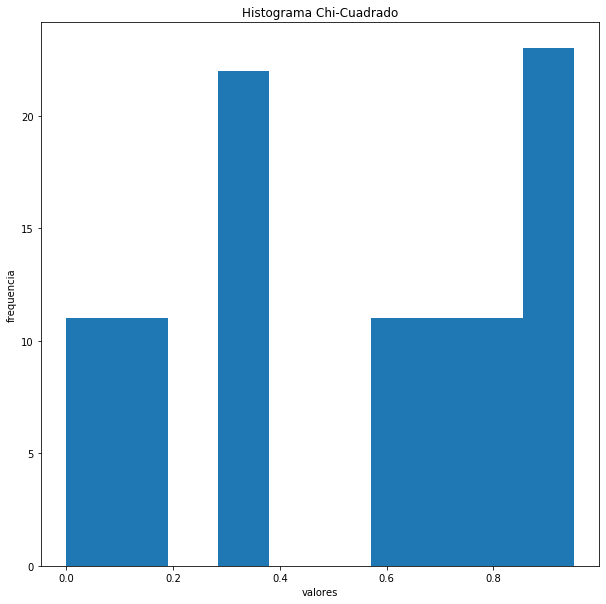

In [66]:
#HISTOGRAMA CONGRUENCIA LINEAL
print("HISTOGRAMA CONGRUENCIA LINEAL")
plt.hist(arreglo2)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi-Cuadrado')
plt.show()

# Comparación 

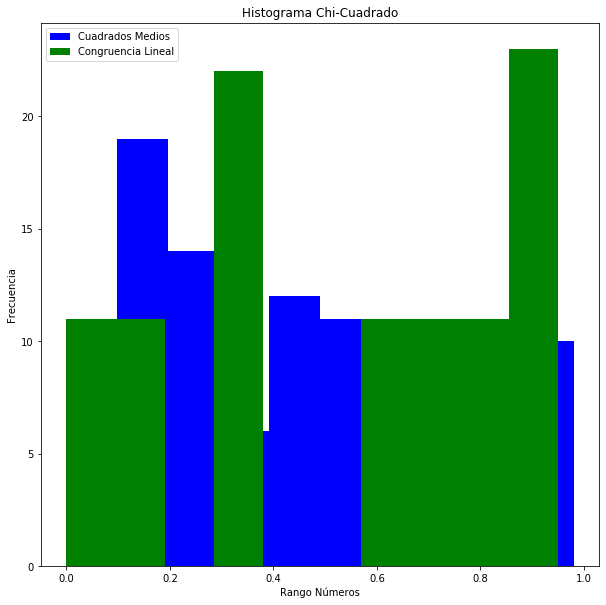

In [67]:
plt.hist(arreglo,color='blue',label='Cuadrados Medios')
plt.hist(arreglo2,color='Green',label='Congruencia Lineal')
plt.xlabel('Rango Números')
plt.ylabel('Frecuencia')
plt.title('Histograma Chi-Cuadrado')
plt.legend(loc='upper left')
plt.show()

# Conclusión

El mejor metodo que presenta es el de los Cuadrados Medios ya que genera numeros aleatorios adecuados para realizar la práctica.

Tenemos el valor de:

**Chi-Cuadrado Cuadrados Medios: 12.6**

**Chi-Cuadrado Congruencia Lineal: 61.8**